In [7]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [8]:
# Importing the dataset
df = pd.read_excel('hr_comma_sep.xlsx')

In [9]:
# Displaying top 5 records of dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
df.info() # Getting info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
df.describe().T # Describing the dataset

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [12]:
df.columns # Getting columns of the dataset

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [13]:
df.dtypes # Getting data types of each column

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [14]:
df.isna().sum() # Checking for the null values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [15]:
df[df.duplicated()] # Checking for the duplicate records in the dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [16]:
df.shape # Getting shape of the dataset

(14999, 10)

In [17]:
df.drop_duplicates(inplace = True) # Dropping the duplicate records from dataset

In [18]:
df.shape # Printing shape after dropping duplicate records

(11991, 10)

In [19]:
df['left'].value_counts() # Getting count of the person who left and not left the organization

0    10000
1     1991
Name: left, dtype: int64

In [20]:
df['sales'].value_counts() # Getting count of persons in each department 

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: sales, dtype: int64

In [21]:
df['salary'].value_counts() # Getting count of each salary level

low       5740
medium    5261
high       990
Name: salary, dtype: int64

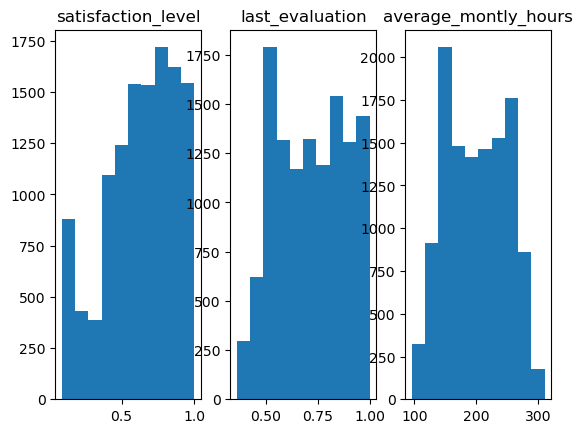

In [23]:
# Plotting histograms 
plt.subplot(1, 3, 1)
plt.hist(df['satisfaction_level'])
plt.title('satisfaction_level')

plt.subplot(1, 3, 2)
plt.hist(df['last_evaluation'])
plt.title('last_evaluation')

plt.subplot(1, 3, 3)
plt.hist(df['average_montly_hours'])
plt.title('average_montly_hours')

plt.show()

In [24]:
cor = df.corr() # Finding correlation between columns

/var/folders/bx/3v6gtz555rbcxsjzxg0cp8pw0000gn/T/ipykernel_801/2226764872.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


In [25]:
cor 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_montly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


<Axes: >

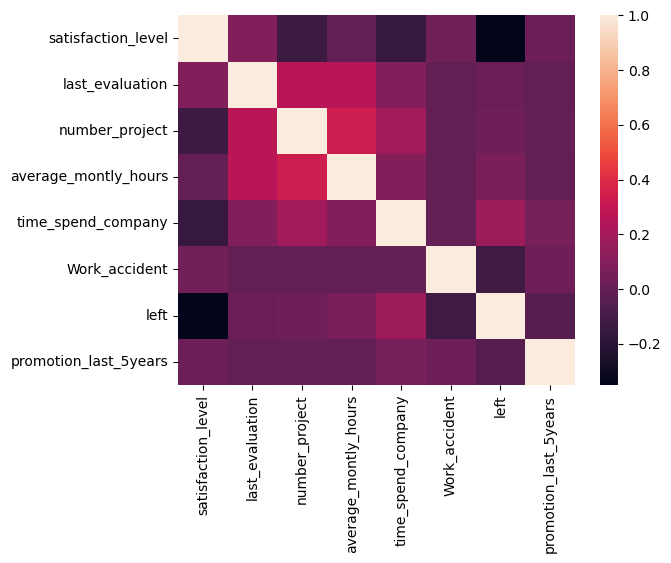

In [26]:
# Importing seaborn for creating heatmap
import seaborn as sns
sns.heatmap(cor)

In [27]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

<Axes: xlabel='number_project', ylabel='count'>

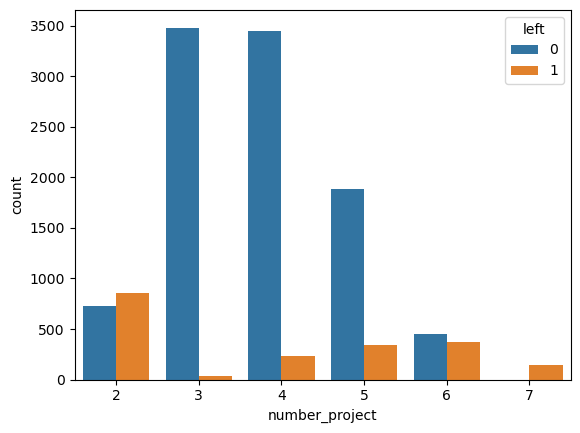

In [29]:
sns.countplot(x='number_project',hue='left',data=df) # Creating countplot of 'number_project' and 'left' columns

# People who have done less or more projects have more tendency to left the organization.

In [30]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [31]:
X = df[df['left'] == 1].iloc[:,[0,1]].values # Creating dataframe of 'satisfaction_level' and 'last_evaluation' columns

In [32]:
X

array([[0.38, 0.53],
       [0.8 , 0.86],
       [0.11, 0.88],
       ...,
       [0.41, 0.53],
       [0.84, 0.96],
       [0.4 , 0.51]])

In [33]:
# Perform clustering of Employees who left based on their satisfaction and evaluation. 
my_cls = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1234) 

In [34]:
y_kmeans = my_cls.fit_predict(X)
y_kmeans

/Users/anshika/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 2, ..., 1, 0, 1], dtype=int32)

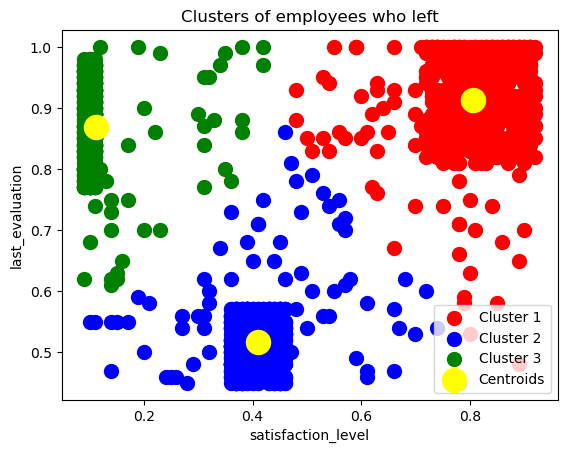

In [35]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(my_cls.cluster_centers_[:, 0], my_cls.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of employees who left')
plt.xlabel('satisfaction_level')
plt.ylabel('last_evaluation')
plt.legend()
plt.show()

In [36]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [37]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [38]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [39]:
df['salary'].replace(['low', 'medium', 'high'],[0, 1, 2], inplace = True) # Converting categorical values into numerical values

In [40]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,0
1,0.80,0.86,5,262,6,0,1,0,sales,1
2,0.11,0.88,7,272,4,0,1,0,sales,1
3,0.72,0.87,5,223,5,0,1,0,sales,0
4,0.37,0.52,2,159,3,0,1,0,sales,0


In [41]:
encoded = pd.get_dummies(df.sales, prefix = 'sales', prefix_sep = '_') # One hot encoding on sales column
df = pd.concat([df, encoded], axis = 'columns')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,sales,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,0,0,0,0,0,0,0,1,0,0


In [42]:
df.drop(['sales'], axis = 'columns', inplace = True)

In [43]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary', 'sales_IT', 'sales_RandD',
       'sales_accounting', 'sales_hr', 'sales_management', 'sales_marketing',
       'sales_product_mng', 'sales_sales', 'sales_support', 'sales_technical'],
      dtype='object')

In [44]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [45]:
df[['Work_accident', 'left']].groupby(['Work_accident']).mean().sort_values(by = 'left')

,left
Work_accident,
1,0.056757
0,0.185978


In [46]:
# Creating dataframes X and y
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'time_spend_company', 'promotion_last_5years', 'salary']]
y = df['left']

In [47]:
X.head()

,satisfaction_level,last_evaluation,number_project,time_spend_company,promotion_last_5years,salary
0,0.38,0.53,2,3,0,0
1,0.80,0.86,5,6,0,1
2,0.11,0.88,7,4,0,1
3,0.72,0.87,5,5,0,0
4,0.37,0.52,2,3,0,0


In [84]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Splitting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123, stratify = y)

In [85]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

Before OverSampling, counts of label '1': 1593
Before OverSampling, counts of label '0': 7999 



In [128]:
X_test.size

14394

In [86]:
# Importing librabry to handle imbalanced data
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE

# Importing libraries for generating reports
from sklearn.metrics import classification_report, accuracy_score, make_scorer, confusion_matrix, roc_auc_score, roc_curve


In [92]:
# Building LogistingRegression Model
from sklearn.linear_model import LogisticRegression

param_grid = {
    'logisticregression__C': [0.1, 1, 10, 100],
    'logisticregression__penalty': ['l2']
}

# Building the pipeline to handle imbalanced data
imba_pipeline_logistic = make_pipeline(SMOTE(random_state=42), LogisticRegression())
grid_imba_logistic = GridSearchCV(imba_pipeline_logistic, param_grid, cv=kf, scoring='recall', return_train_score=True)
grid_imba_logistic.fit(X_train, y_train)
grid_imba_logistic.best_params_
grid_imba_logistic.best_score_

0.8361329626781806

In [93]:
# Predicting test data on logistic regression model
y_test_pred_logistic = grid_imba_logistic.predict(X_test)

In [123]:
# Generating roc_score and classification report of Logistic Regression
roc_logistic = roc_auc_score(y_test, y_test_pred_logistic)
print(f'roc_score_logistic: {roc_logistic}')
print("\nclassification report: ", classification_report(y_test, y_test_pred_logistic))

roc_score_logistic: 0.7868590830213035

classification report:                precision    recall  f1-score   support

           0       0.95      0.75      0.84      2001
           1       0.40      0.82      0.54       398

    accuracy                           0.77      2399
   macro avg       0.68      0.79      0.69      2399
weighted avg       0.86      0.77      0.79      2399



In [107]:
# Building RandomForestClassifier Model
from sklearn.ensemble import RandomForestClassifier

randForClass = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
imba_pipeline_random_forest = make_pipeline(SMOTE(random_state=42), randForClass)

param_grid = { 
    'randomforestclassifier__max_depth': range(2, 10),
    'randomforestclassifier__min_samples_leaf': range(10, 51, 10),  # 5
    'randomforestclassifier__min_samples_split': range(20, 81, 20)  # 4
}

grid_imba_random_forest = GridSearchCV(imba_pipeline_random_forest, param_grid, cv=kf, scoring='recall', return_train_score=True)
grid_imba_random_forest.fit(X_train, y_train)
grid_imba_random_forest.best_params_
grid_imba_random_forest.best_score_

0.9234045070089312

In [122]:
# Predicting test data on random forest classifier
y_test_pred_random_forest = grid_imba_random_forest.predict(X_test)

# Generating roc_score and classification report of Random Forest
roc_random_forest = roc_auc_score(y_test, y_test_pred_random_forest)
print(f'roc_score_random_forest: {roc_random_forest}')
print("\nclassification report: ", classification_report(y_test, y_test_pred_random_forest))

roc_score_random_forest: 0.950532899379456

classification report:                precision    recall  f1-score   support

           0       0.98      0.99      0.99      2001
           1       0.94      0.91      0.93       398

    accuracy                           0.98      2399
   macro avg       0.96      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



In [112]:
# Building GradientBoostingClassifier Model
from sklearn.ensemble import GradientBoostingClassifier

gradienBoosting = GradientBoostingClassifier()

imba_pipeline_gradient_boosting = make_pipeline(SMOTE(random_state=42), gradienBoosting)

param_grid = {
    'gradientboostingclassifier__max_depth' : [8]
}

grid_imba_gradient_boosting = GridSearchCV(imba_pipeline_gradient_boosting, param_grid, cv=kf, scoring='recall', return_train_score=True)
grid_imba_gradient_boosting.fit(X_train, y_train)
grid_imba_gradient_boosting.best_params_
grid_imba_gradient_boosting.best_score_

0.9158632519074941

In [124]:
# Predicting test data on gradient boosting classiefier
y_test_pred_gradient_boosting = grid_imba_gradient_boosting.predict(X_test)

# Generating roc_score and classification report of Gradient Boosting
roc_gradient_boosting = roc_auc_score(y_test, y_test_pred_gradient_boosting)
print(f'roc_score_gradient_boosting: {roc_gradient_boosting}')
print("\nclassification report: ", classification_report(y_test, y_test_pred_gradient_boosting))

roc_score_gradient_boosting: 0.9462643050334129

classification report:                precision    recall  f1-score   support

           0       0.98      0.99      0.98      2001
           1       0.94      0.90      0.92       398

    accuracy                           0.97      2399
   macro avg       0.96      0.95      0.95      2399
weighted avg       0.97      0.97      0.97      2399



In [114]:
# Generating roc curve for all the models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_test_pred_logistic, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_test_pred_random_forest, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_test_pred_gradient_boosting, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

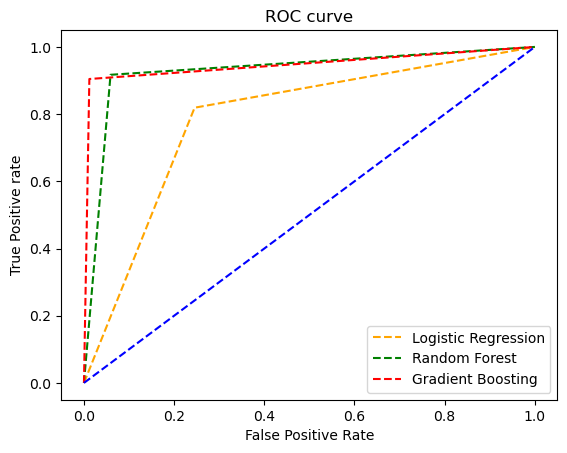

In [116]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Gradient Boosting')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [118]:
# Confusion Matrix for Logistic regression
cm_logistic = confusion_matrix(y_test, y_test_pred_logistic)
cm_logistic

array([[1510,  491],
       [  72,  326]])

In [119]:
# Confusion Matrix for Random Forest
cm_random_forest = confusion_matrix(y_test, y_test_pred_random_forest)
cm_random_forest

array([[1883,  118],
       [  33,  365]])

In [120]:
# Confusion Matrix for Gradient Boosting
cm_gradient_boosting = confusion_matrix(y_test, y_test_pred_gradient_boosting)
cm_gradient_boosting

array([[1977,   24],
       [  38,  360]])

In [126]:
# Predicting probabilities for test data
proba = grid_imba_random_forest.predict_proba(X_test)
proba

array([[0.93168653, 0.06831347],
       [0.97744121, 0.02255879],
       [0.99399253, 0.00600747],
       ...,
       [0.99756809, 0.00243191],
       [0.98962673, 0.01037327],
       [0.99853922, 0.00146078]])

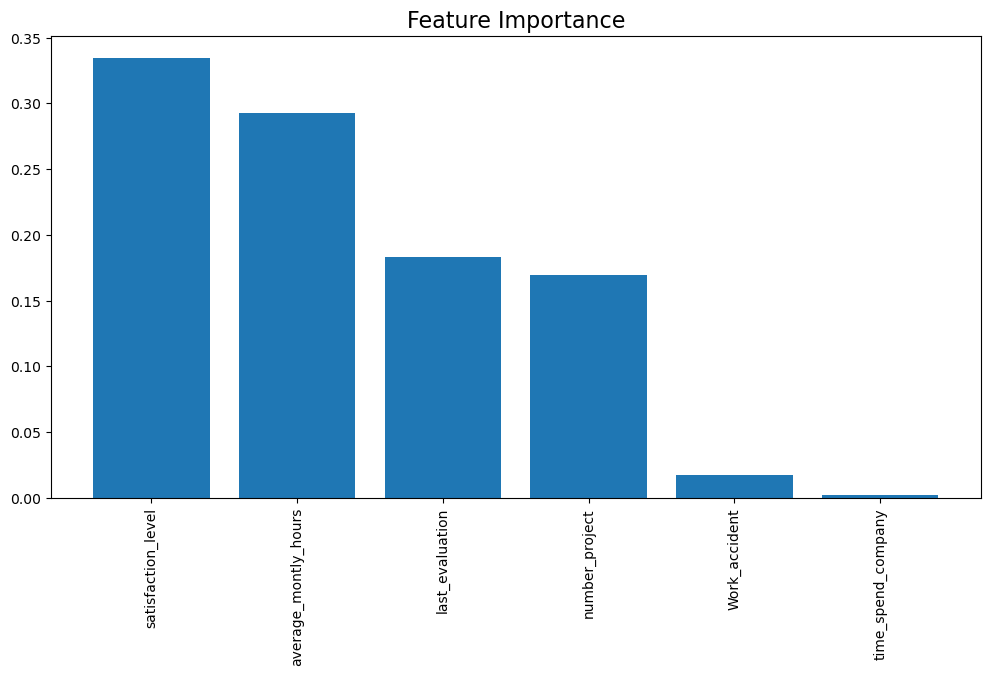

In [134]:
from sklearn.preprocessing import StandardScaler
# Refit RF classifier
clf_rf = RandomForestClassifier(n_estimators=50,
                                criterion="entropy",
                                max_features=0.4,
                                min_samples_leaf=1,
                                class_weight="balanced",
                                n_jobs=-1,
                                random_state=123)


clf_rf.fit(StandardScaler().fit_transform(X_train), y_train)

# Plot features importance
importances = clf_rf.feature_importances_
importances
indices = np.argsort(clf_rf.feature_importances_)[::-1]
plt.figure(figsize=(12, 6))
plt.bar(range(1, 7), importances[indices], align="center")
plt.xticks(range(1, 7), df.columns[df.columns != "left"][indices], rotation=90)
plt.title("Feature Importance", {"fontsize": 16});